In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon_sales_sample.csv")

# Show first 5 rows
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [2]:
# Basic info about dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
# Fill missing values for relevant columns
df['Item Type'] = df['Item Type'].fillna("Unknown")
df['Region'] = df['Region'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Sales Channel'] = df['Sales Channel'].fillna("Unknown")


In [7]:
# Check for missing values again
df.isnull().sum()


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

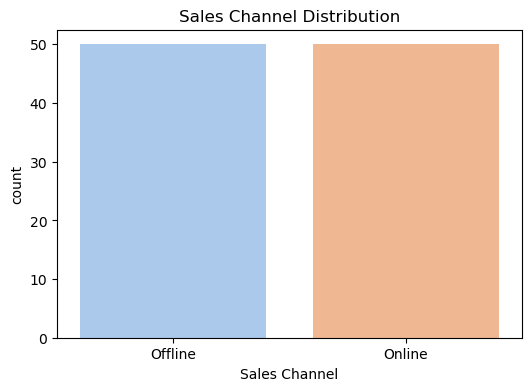

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales channel count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sales Channel', palette='pastel', hue='Sales Channel', legend=False)
plt.title("Sales Channel Distribution")
plt.show()


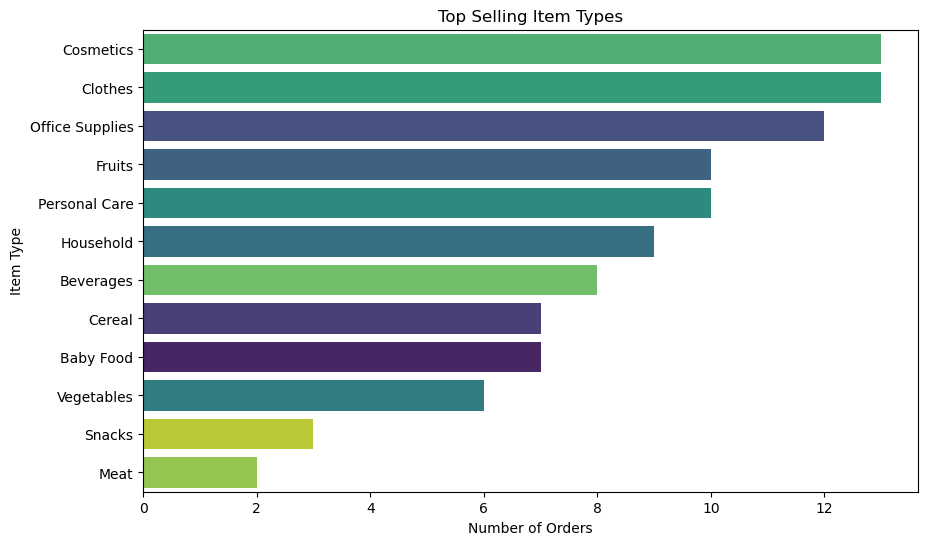

In [9]:
# Top selling item types
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Item Type', order=df['Item Type'].value_counts().index, palette='viridis', hue='Item Type', legend=False)
plt.title("Top Selling Item Types")
plt.xlabel("Number of Orders")
plt.ylabel("Item Type")
plt.show()


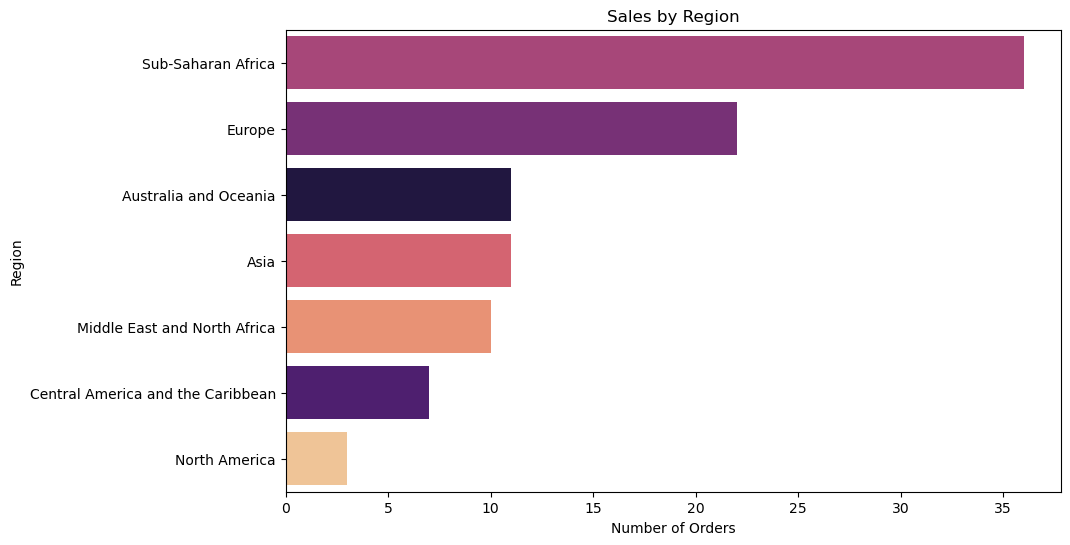

In [10]:
# Sales count by region
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index, palette='magma', hue='Region', legend=False)
plt.title("Sales by Region")
plt.xlabel("Number of Orders")
plt.ylabel("Region")
plt.show()


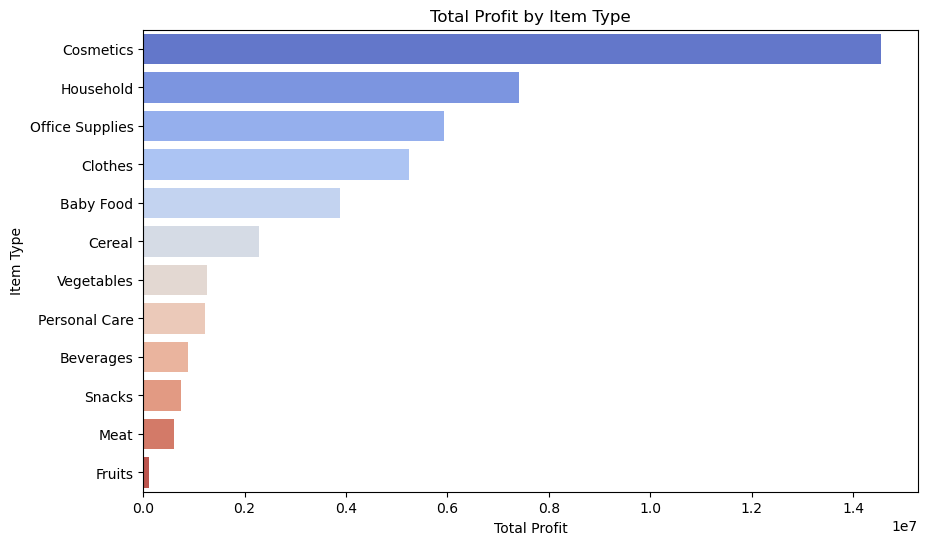

In [11]:
# Total profit by item type
profit_by_item = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=profit_by_item.values, y=profit_by_item.index, palette='coolwarm', hue=profit_by_item.index, legend=False)
plt.title("Total Profit by Item Type")
plt.xlabel("Total Profit")
plt.ylabel("Item Type")
plt.show()


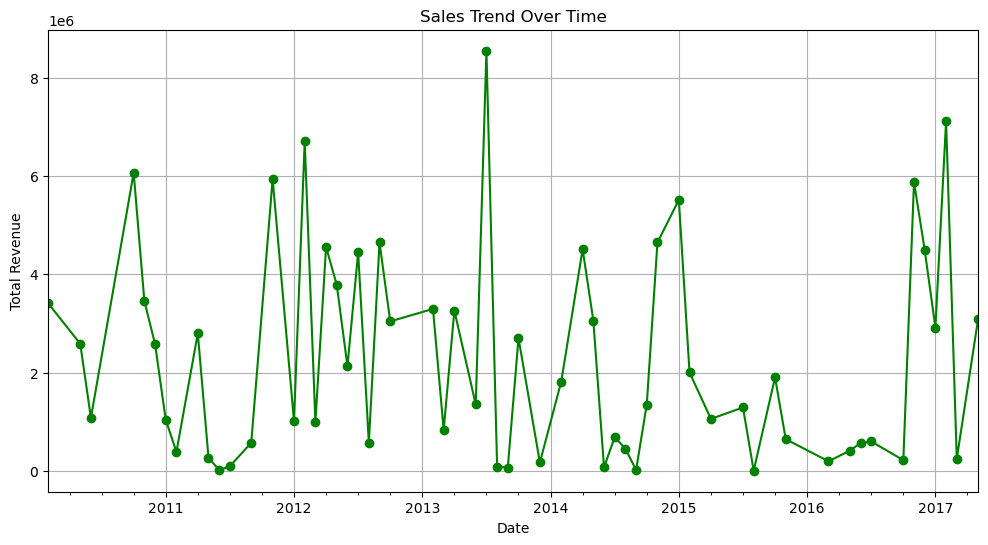

In [12]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by year and month
sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

# Plot sales trend
plt.figure(figsize=(12,6))
sales_trend.plot(kind='line', marker='o', color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


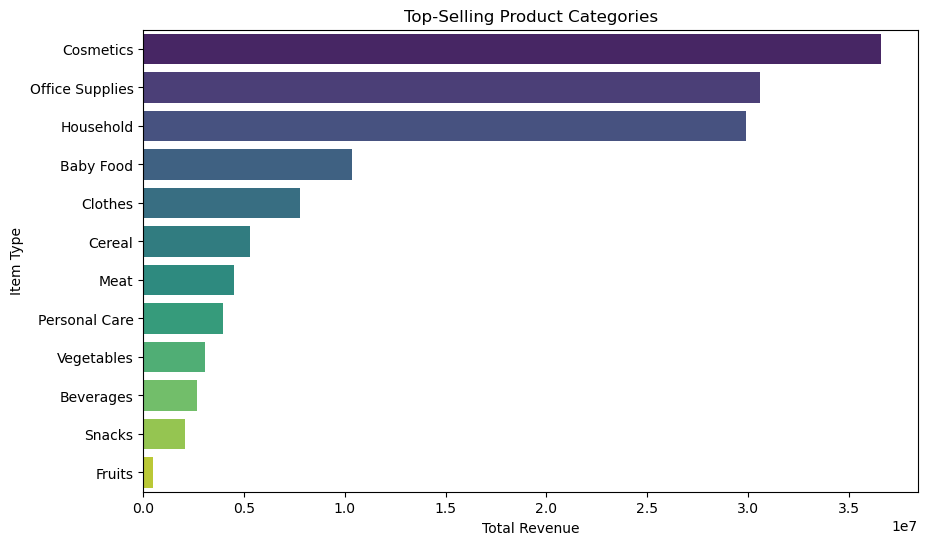

In [14]:
# Group by Item Type and sum revenue
category_sales = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

# Plot without warning
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, 
            y=category_sales.index, 
            hue=category_sales.index, 
            dodge=False, 
            palette='viridis', 
            legend=False)
plt.title("Top-Selling Product Categories")
plt.xlabel("Total Revenue")
plt.ylabel("Item Type")
plt.show()


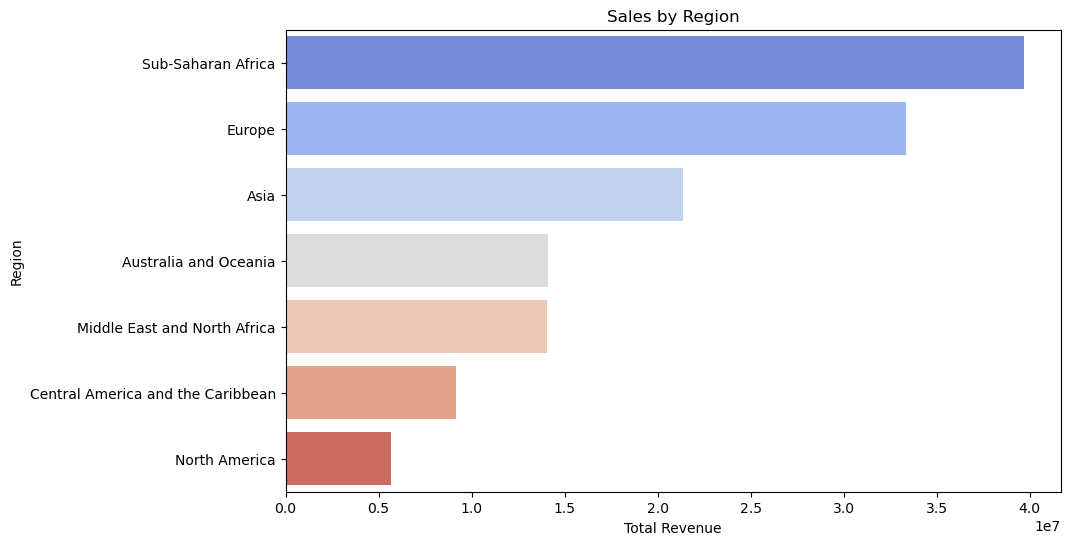

In [15]:
# Group by Region and sum revenue
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

# Plot without warning
plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, 
            y=region_sales.index, 
            hue=region_sales.index, 
            dodge=False, 
            palette='coolwarm', 
            legend=False)
plt.title("Sales by Region")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.show()


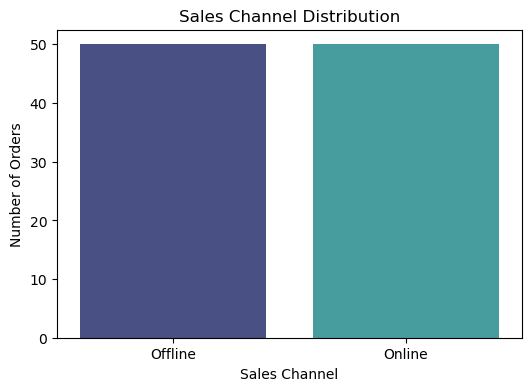

In [16]:
# Count sales channel occurrences
sales_channel_counts = df['Sales Channel'].value_counts()

# Plot without warning
plt.figure(figsize=(6,4))
sns.barplot(x=sales_channel_counts.index, 
            y=sales_channel_counts.values, 
            hue=sales_channel_counts.index, 
            dodge=False, 
            palette='mako', 
            legend=False)
plt.title("Sales Channel Distribution")
plt.xlabel("Sales Channel")
plt.ylabel("Number of Orders")
plt.show()


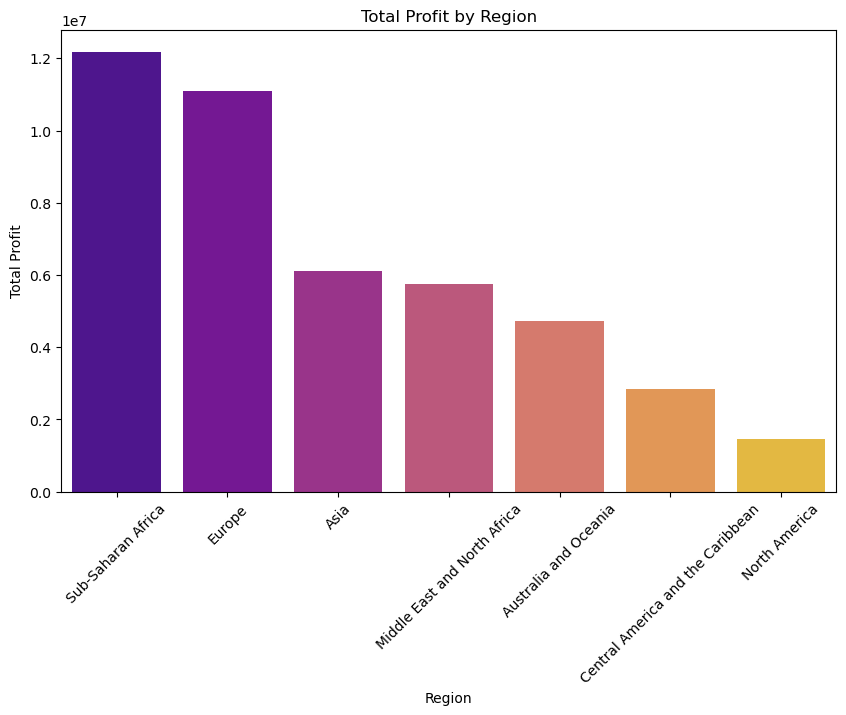

In [17]:
# Group by region and sum total profit
region_profit = df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

# Plot without warning
plt.figure(figsize=(10,6))
sns.barplot(x=region_profit.index,
            y=region_profit.values,
            hue=region_profit.index,
            dodge=False,
            palette='plasma',
            legend=False)
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


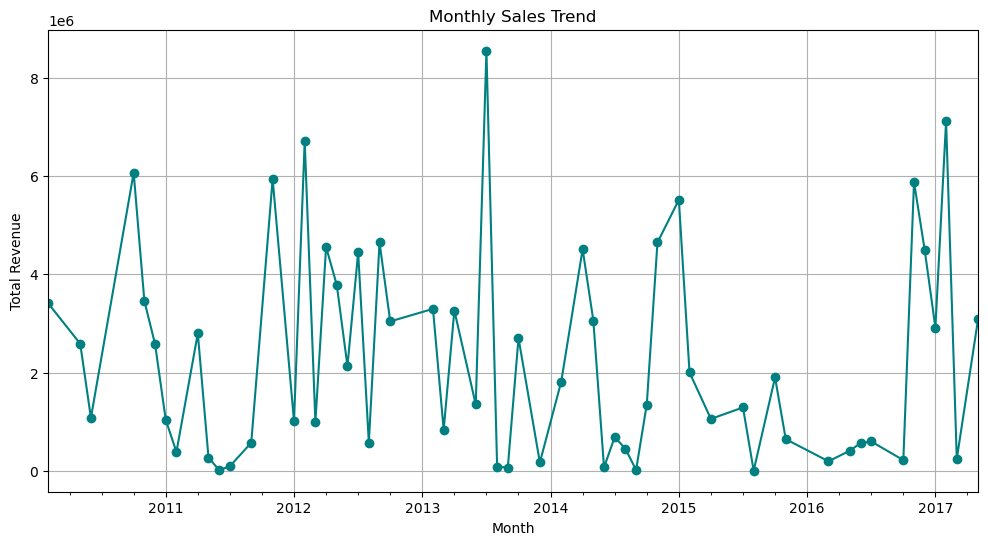

In [18]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and calculate total revenue
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


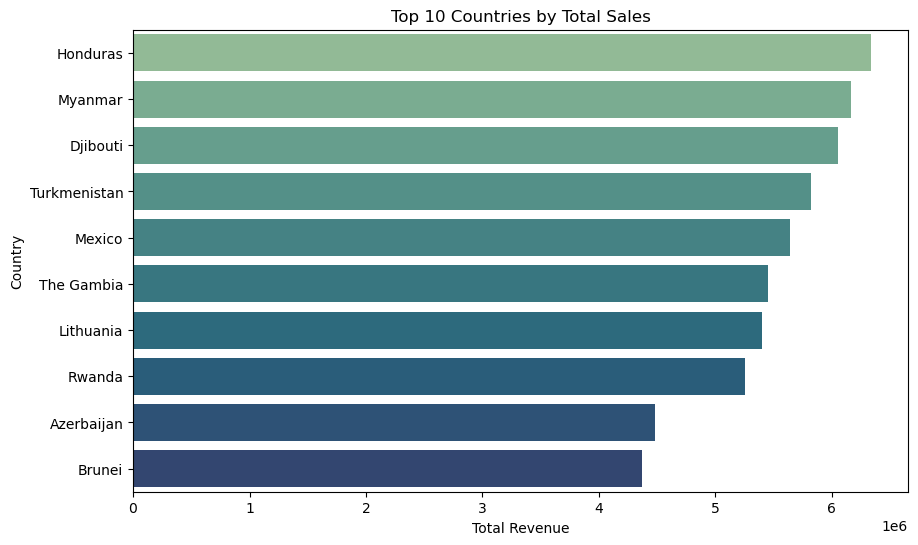

In [19]:
# Group by country and sum total revenue
country_sales = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index, hue=country_sales.index, dodge=False, legend=False, palette='crest')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()


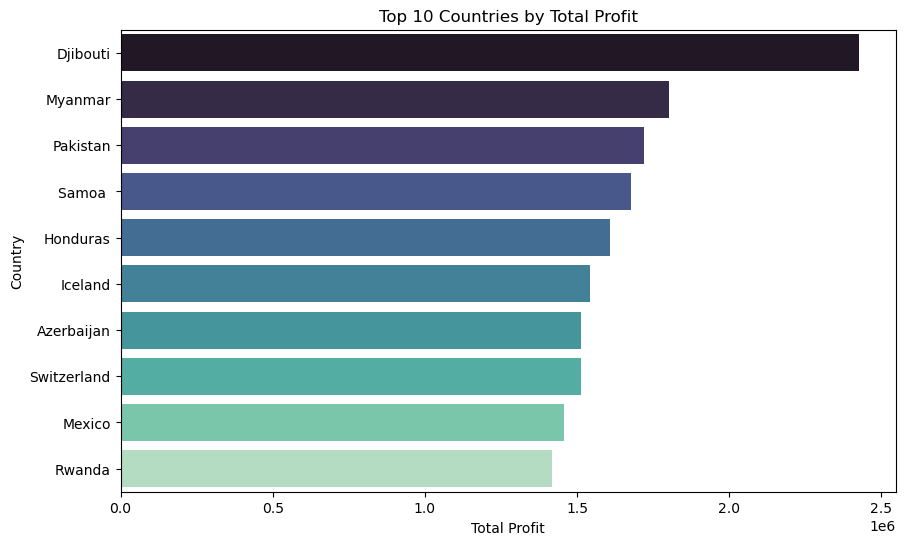

In [20]:
# Group by country and sum total profit
country_profit = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_profit.values, y=country_profit.index, hue=country_profit.index, dodge=False, legend=False, palette='mako')
plt.title('Top 10 Countries by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')
plt.show()


## Step 3 – Top 10 Countries by Total Profit

In this step, we:
1. Grouped the dataset by **Country**.
2. Calculated the **total profit** for each country.
3. Sorted the countries in **descending order** of total profit.
4. Visualized the **Top 10 countries** using a horizontal bar chart with Seaborn.

**Observation:**
- The chart helps identify which countries generated the highest profits.
- This can guide decision-making for targeting profitable markets.
